In [233]:
def first_fit_bin_packing(item_sizes, bin_capacity):
    bins = []  # List to store the bins and their current content

    for item_size in item_sizes:
        # Try to place the item in an existing bin
        placed = False
        for bin_content in bins:
            if sum(bin_content) + item_size <= bin_capacity:
                bin_content.append(item_size)
                placed = True
                break

        # If the item couldn't fit in any existing bin, create a new bin
        if not placed:
            bins.append([item_size])

    return bins

# Example usage:
item_sizes = [4, 8, 1, 6, 2, 5, 3]
bin_capacity = 10

result = first_fit_bin_packing(item_sizes, bin_capacity)
print("Bins and their content:")
for i, bin_content in enumerate(result, 1):
    print(f"Bin {i}: {bin_content}")


Bins and their content:
Bin 1: [4, 1, 2, 3]
Bin 2: [8]
Bin 3: [6]
Bin 4: [5]


In [234]:
import random

In [235]:
def bin_sorted(array, capacity):
    all_bins = []
    sum_of_bins = []
    sorted_array = sorted(array)

    current_bin = []
    current_bin_sum = 0
    len

    for item in sorted_array:
        if current_bin_sum + item > capacity:
            all_bins.append(current_bin)
            current_bin = [item]
            current_bin_sum = item
        else:
            current_bin.append(item)
            current_bin_sum += item

    if current_bin:
        all_bins.append(current_bin)
        sum_of_bins.append(sum(current_bin))

    return all_bins

# Example usage:
array = [int(random.uniform(2,1000)) for i in range(100)]
capacity = 1000

result = bin_sorted(array, capacity)
print(result)
print("Bins and their content:")
for i, bin_content in enumerate(result, 1):
    print(f"Bin {i}: {bin_content}")


[[2, 5, 8, 18, 28, 28, 32, 38, 39, 42, 47, 52, 81, 96, 114, 120, 121], [134, 160, 163, 172, 175, 186], [197, 209, 213, 240], [243, 279, 281], [290, 296, 299], [307, 307, 314], [316, 326, 340], [347, 349], [349, 350], [360, 361], [363, 385], [390, 397], [398, 405], [406, 432], [432, 440], [473, 473], [487, 488], [500], [519], [523], [533], [556], [558], [585], [591], [593], [607], [619], [621], [626], [632], [634], [673], [692], [714], [717], [728], [769], [772], [804], [808], [816], [829], [842], [844], [850], [855], [905], [907], [923], [927], [929], [936], [972], [978], [989], [989], [991]]
Bins and their content:
Bin 1: [2, 5, 8, 18, 28, 28, 32, 38, 39, 42, 47, 52, 81, 96, 114, 120, 121]
Bin 2: [134, 160, 163, 172, 175, 186]
Bin 3: [197, 209, 213, 240]
Bin 4: [243, 279, 281]
Bin 5: [290, 296, 299]
Bin 6: [307, 307, 314]
Bin 7: [316, 326, 340]
Bin 8: [347, 349]
Bin 9: [349, 350]
Bin 10: [360, 361]
Bin 11: [363, 385]
Bin 12: [390, 397]
Bin 13: [398, 405]
Bin 14: [406, 432]
Bin 15: [43

In [236]:
import random

def bin_sorted_alternate_optimized(array, capacity):
    all_bins = []

    while array:
        current_bin = [array.pop(0)]

        for item in sorted(array, reverse=True):
            if sum(current_bin) + item <= capacity:
                current_bin.append(array.pop(array.index(item)))

        all_bins.append(current_bin)

    return all_bins

# Example usage:
array = [int(random.uniform(2, i)) for i in range(30)]
capacity = 10
result = bin_sorted_alternate_optimized(array, capacity)
print(result)
print(array)


[[1, 9], [1, 8], [2, 8], [2, 7], [2, 7], [2, 7], [2, 7], [3, 5], [10], [4, 4], [10], [11], [19], [14], [17], [3, 4], [11], [23], [24], [4]]
[]


In [243]:
def best_fit_decreasing(items, bin_capacity):
    items = sorted(items, reverse=True)  # Sort items in decreasing order
    bins = []

    for item in items:
        found_bin = False
        for bin in bins:
            if sum(bin) + item <= bin_capacity:
                bin.append(item)
                found_bin = True
                break

        if not found_bin:
            bins.append([item])

    return bins

# Example usage:
item_sizes = [4, 8, 6, 2, 9, 7, 5, 1, 3, 10]
bin_capacity = 15
result = best_fit_decreasing(item_sizes, bin_capacity)
result2 = bin_sorted_alternate_optimized(item_sizes, bin_capacity)
print(result)
print(result2)


[[10, 5], [9, 6], [8, 7], [4, 3, 2, 1]]
[[4, 10, 1], [8, 7], [6, 9], [2, 5, 3]]


In [ ]:
import time
import matplotlib.pyplot as plt

sizes = []
first_fit_times = []
bin_sorted_times = []
bin_sorted_alternate_times = []
best_fit_decreasing_times = []

for _ in range(2,1000):
    array = [int(random.uniform(2, i)) for i in range(100+_)]
    capacity = 100+_

    # Benchmark first_fit_bin_packing
    start_time = time.time()
    result1 = first_fit_bin_packing(array, capacity)
    first_fit_execution_time = time.time() - start_time

    # Benchmark bin_sorted
    start_time = time.time()
    result2 = bin_sorted(array, capacity)
    bin_sorted_execution_time = time.time() - start_time

    # Benchmark bin_sorted
    start_time = time.time()
    result3 = bin_sorted_alternate_optimized(array, capacity)
    bin_sorted_alternate_time = time.time() - start_time

    # Benchmark bin_sorted
    start_time = time.time()
    result4 = best_fit_decreasing(array, capacity)
    best_fit_decreasing_time = time.time() - start_time




    print(len(result1),len(result2),len(result3),len(result4))
    sizes.append(_)
    first_fit_times.append(first_fit_execution_time)
    bin_sorted_times.append(bin_sorted_execution_time)
    bin_sorted_alternate_times.append(bin_sorted_alternate_time)
    best_fit_decreasing_times.append(best_fit_decreasing_time)


28 35 27 0
29 33 27 0
30 35 27 0
26 31 25 0
29 35 27 0
32 38 29 0
33 36 29 0
30 36 28 0
33 38 30 0
29 33 27 0
32 37 30 0
32 37 30 0
31 38 30 0
30 37 29 0
33 41 31 0
34 39 31 0
32 39 30 0
35 40 32 0
34 40 31 0
35 41 32 0
34 37 31 0
33 41 32 0
36 43 33 0
33 39 31 0
35 42 33 0
36 40 32 0
38 44 35 0
35 40 32 0
36 42 34 0
36 40 31 0
35 43 33 0
36 42 33 0
39 45 36 0
35 41 33 0
35 40 32 0
36 44 35 0
38 46 36 0
42 49 37 0
34 40 31 0
34 43 32 0
39 47 37 0
38 45 36 0
40 49 38 0
40 47 37 0
38 44 36 0
40 46 37 0
39 47 37 0
43 48 39 0
36 41 34 0
47 55 42 0
42 50 39 0
42 49 39 0
44 52 41 0
45 54 42 0
45 52 41 0
43 49 39 0
41 48 38 0
44 54 41 0
46 56 44 0
46 54 43 0
50 63 46 0
44 51 40 0
41 49 39 0
44 53 41 0
48 57 44 0
46 54 43 0
51 58 46 0
51 61 46 0
42 52 41 0
47 57 44 0
44 52 41 0
51 57 45 0
42 52 41 0
50 61 46 0
47 56 44 0
52 62 48 0
49 56 45 0
50 60 47 0
51 61 48 0
50 60 46 0
48 57 45 0
47 55 44 0
48 57 46 0
53 61 49 0
54 64 50 0
52 60 46 0
50 62 47 0
50 60 48 0
48 56 46 0
58 69 53 0
47 58 46 0

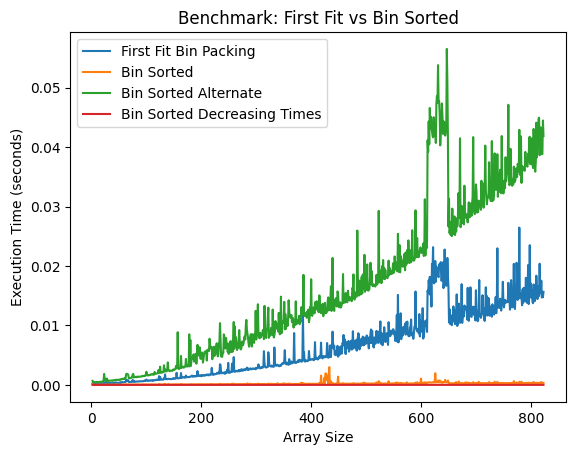

In [232]:
# Plot the results
plt.plot(sizes, first_fit_times, label='First Fit Bin Packing')
plt.plot(sizes, bin_sorted_times, label='Bin Sorted')
plt.plot(sizes, bin_sorted_alternate_times, label="Bin Sorted Alternate")
plt.plot(sizes, best_fit_decreasing_times, label="Bin Sorted Decreasing Times")
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()